In [32]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import os

from astropy import units as u
from astropy.time import Time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.9f}'.format

In [14]:
data = pd.read_csv(
    'res_iter_p_pdot_1237_D-14.txt',
    sep='\s+',
    names=['Period, s', 'P_dot, s/s', 'STD_res, ms'],
    dtype={'Period, s': str, 'P_dot, s/s': str, 'STD_res, ms': np.float64}
)

In [15]:
data.head()

,"Period, s","P_dot, s/s","STD_res, ms"
0,0.72330,-10.0D-14,395610.002283932
1,0.72330,-9.97D-14,393432.554697908
2,0.72330,-9.94D-14,401145.401188865
3,0.72330,-9.91D-14,389259.771763679
4,0.72330,-9.88D-14,399320.026250416


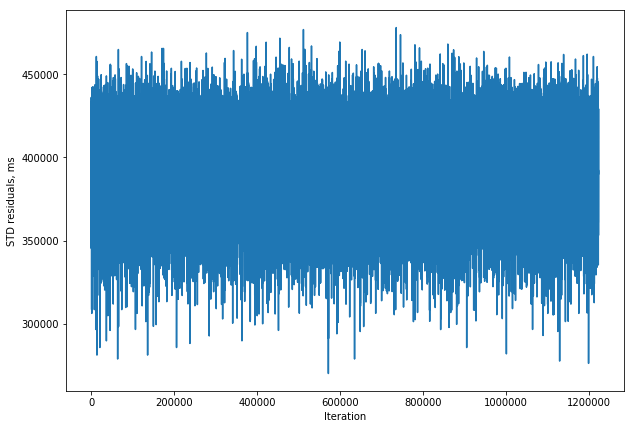

In [16]:
plt.figure(figsize=(10,7))
plt.xlabel('Iteration')
plt.ylabel('STD residuals, ms')
plt.plot(data['STD_res, ms'])
#plt.savefig('STD_res_p_pdot_prec_1237+25.png', format='png', dpi=150)
plt.show()

In [17]:
data_s = data.sort_values(by='STD_res, ms', ascending=True).reset_index(drop=True)

In [18]:
best = data_s.head(100)

In [19]:
best

,"Period, s","P_dot, s/s","STD_res, ms"
0,0.72334674,-0.52D-14,270234.653789980
1,0.72339804,0.2D-14,276317.514034335
2,0.72339234,-0.43D-14,277709.849013535
3,0.7233519,0.17D-14,278939.654613044
4,0.72335190,0.17D-14,278939.654613044
5,0.7233111,-0.43D-14,281307.147117417
6,0.72331110,-0.43D-14,281307.147117417
7,0.72338184,-0.55D-14,282033.628949039
8,0.72337401,0.29D-14,285821.579857852
9,0.72331680,0.2D-14,285842.509709598


In [20]:
best.to_csv('bestPPdot_1237.txt', sep=' ', float_format='%.7f', index=False, header=False)

In [21]:
best

,"Period, s","P_dot, s/s","STD_res, ms"
0,0.72334674,-0.52D-14,270234.653789980
1,0.72339804,0.2D-14,276317.514034335
2,0.72339234,-0.43D-14,277709.849013535
3,0.7233519,0.17D-14,278939.654613044
4,0.72335190,0.17D-14,278939.654613044
5,0.7233111,-0.43D-14,281307.147117417
6,0.72331110,-0.43D-14,281307.147117417
7,0.72338184,-0.55D-14,282033.628949039
8,0.72337401,0.29D-14,285821.579857852
9,0.72331680,0.2D-14,285842.509709598


### Чтение файла с периодом

In [266]:
pd.options.display.float_format = '{:.10f}'.format
data = pd.read_csv(
    './1112+50/all_pulses/res_iter_p_1112.txt',
    sep='\s+',
    names=['Freq, s-1', 'STD_res, us'],
    dtype={'Freq, s-1': np.float64, 'STD_res, us': np.float64}
)

In [267]:
data.head()

,"Freq, s-1","STD_res, us"
0,0.6037100000,473314.6623694107
1,0.6037200000,481442.0180857482
2,0.6037300000,481443.5909364885
3,0.6037400000,470540.9174140784
4,0.6037500000,489775.5799249791


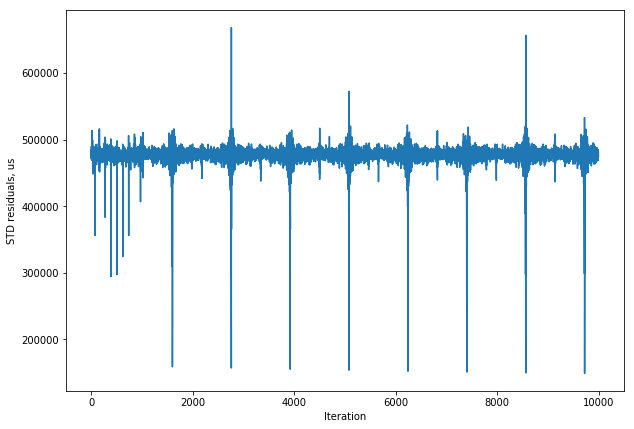

In [268]:
plt.figure(figsize=(10,7))
plt.xlabel('Iteration')
plt.ylabel('STD residuals, us')
plt.plot(data['STD_res, us'])
#plt.savefig('res.png', format='png', dpi=150)
plt.show()

In [269]:
data_s = data.sort_values(by='STD_res, us', ascending=True).reset_index(drop=True)

In [270]:
data_s

,"Freq, s-1","STD_res, us"
0,0.6037972600,148952.2099335583
1,0.6037972500,148952.2118780513
2,0.6037856600,149929.9059952637
3,0.6037856500,149929.9099972428
4,0.6037856400,149929.9125663773
5,0.6037740400,151071.7536589501
6,0.6037740500,151071.7539496708
7,0.6037740300,151071.7577024304
8,0.6037624500,152374.0715832138
9,0.6037624400,152374.0749860204


In [184]:
print(len(data_300), len(data_100))

8 8


In [185]:
data_300.intersection(data_100).intersection(data_34).intersection(data_12)

{0.72331912,
 0.72333072,
 0.72334233,
 0.72335394,
 0.72336554,
 0.72337715,
 0.72338875}

In [10]:
best.to_csv('bestP.txt', sep=' ', float_format='%.10f', index=False, header=False)

### Чтение файла с координатами

In [12]:
data = pd.read_csv(
    'res_iter_coords.txt',
    sep=' ',
    names=['RAJ', 'DECJ', 'STD_res, ms'],
    dtype={'RAJ': str, 'DECJ': str, 'STD_res, ms': np.float64}
)

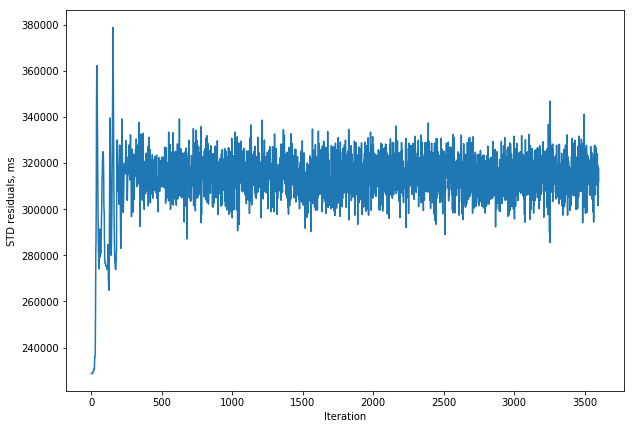

In [14]:
plt.figure(figsize=(10,7))
plt.xlabel('Iteration')
plt.ylabel('STD residuals, ms')
plt.plot(data['STD_res, ms'])
#plt.savefig('res.png', format='png', dpi=150)
plt.show()

In [15]:
data_s = data.sort_values(by='STD_res, ms', ascending=True).reset_index(drop=True)

In [16]:
data_s.head(20)

,RAJ,DECJ,"STD_res, ms"
0,09:46:00,09:52:01,228762.6766550061
1,09:46:00,09:52:00,228762.6774923834
2,09:46:00,09:52:06,228762.6778992576
3,09:46:00,09:52:03,228762.6779669397
4,09:46:00,09:52:10,228762.6794504857
5,09:46:00,09:52:15,228762.6808422789
6,09:46:00,09:52:21,228762.6812340713
7,09:46:00,09:52:28,228762.6819034027
8,09:46:00,09:52:36,228762.6836539868
9,09:46:00,09:52:45,229090.9068074306


### Чтение файла остаточных уклонений

In [258]:
resid = pd.read_csv(
    './1112+50/set_1_year/set_4_sing/resid.ascii',
    sep=' ',
    names=['MJD', 'Resid, us', 'err'],
    dtype={'MJD': np.float64, 'Resid, us': np.float64, 'err': np.float32}
)

In [259]:
np.std(resid['Resid, us'])

2290.9855111266043

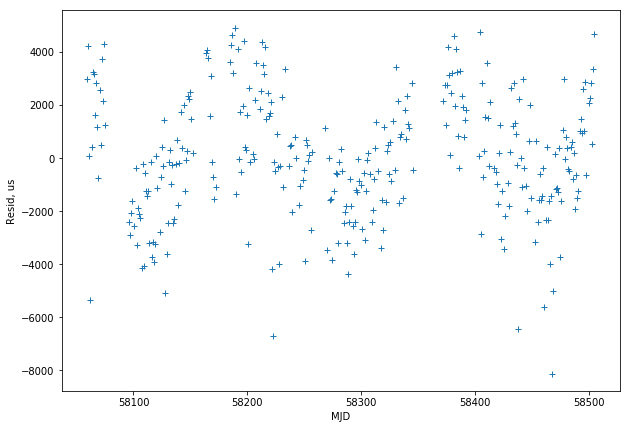

In [260]:
plt.figure(figsize=(10,7))
plt.xlabel('MJD')
plt.ylabel('Resid, us')
plt.plot(resid['MJD'], resid['Resid, us'], '+')
plt.savefig('resid.png', format='png', dpi=150)
#plt.show()

### Чтение координат с периодом

In [2]:
p_coors = pd.read_csv(
    './1112+50/all_pulses/res_iter_p_coords_1112.txt',
    sep='\s+',
    names=['Freq, s-1', 'RAJ', 'DECJ', 'STD_res, us'],
    dtype={'Freq, s-1': np.float64, 'RAJ': str, 'DECJ': str, 'STD_res, us': np.float64}
)
pd.options.display.float_format = '{:.10f}'.format

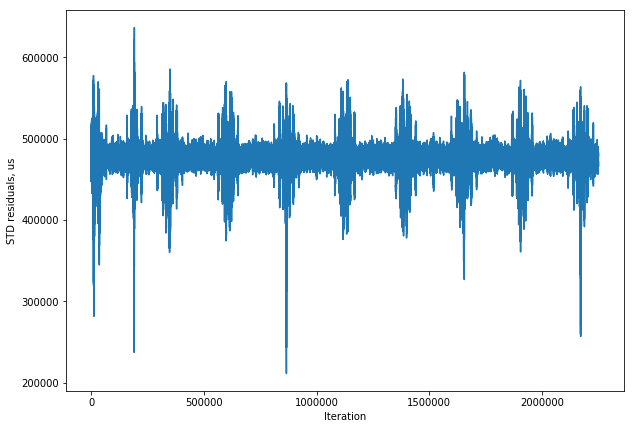

In [3]:
plt.figure(figsize=(10,7))
plt.xlabel('Iteration')
plt.ylabel('STD residuals, us')
plt.plot(p_coors['STD_res, us'])
plt.savefig('res.png', format='png', dpi=150)
#plt.show()

In [4]:
p_coors_s = p_coors.sort_values(by='STD_res, us', ascending=True).reset_index(drop=True)

In [5]:
p_coors_s.head(1000)

,"Freq, s-1",RAJ,DECJ,"STD_res, us"
0,0.6037385000,11:15:20,50:34:27,211548.3786076067
1,0.6037385000,11:15:20,50:34:17,211642.9428676857
2,0.6037385000,11:15:20,50:34:37,211859.5781046735
3,0.6037385000,11:15:20,50:34:47,212574.7911995810
4,0.6037385000,11:15:20,50:34:57,213689.9944634259
5,0.6037385000,11:15:20,50:34:07,215143.1730700022
6,0.6037385000,11:15:20,50:35:07,215199.0038967034
7,0.6037385000,11:15:20,50:35:17,217093.6349817932
8,0.6037385000,11:15:20,50:35:27,219341.9520438796
9,0.6037385000,11:15:20,50:33:57,221419.6866367240


## Код позволяющий выделить **ВСЕ** хорошие решения с разными периодами

In [6]:
best_sol = pd.DataFrame(columns=[
    'Freq, s-1', 
    'RAJ',
    'DECJ',
    'STD_res, us'
])
tres = 400000
idx = 0
for i in range(len(p_coors_s)):
    if p_coors_s['STD_res, us'][i] > tres:
        break
    if p_coors_s['Freq, s-1'][i] not in list(best_sol['Freq, s-1']):
        best_sol.loc[idx] = [
            np.float64(p_coors_s['Freq, s-1'][i]),
            p_coors_s['RAJ'][i],
            p_coors_s['DECJ'][i],
            p_coors_s['STD_res, us'][i]
        ]
        idx += 1

In [7]:
best_sol

,"Freq, s-1",RAJ,DECJ,"STD_res, us"
0,0.6037385000,11:15:20,50:34:27,211548.3786076067
1,0.6037850000,11:15:00,50:32:47,237504.9246643701
2,0.6037965000,11:15:40,50:25:07,256968.5138175632
3,0.6037500000,11:16:20,50:24:27,281710.0269846711
4,0.6037735000,11:16:50,50:43:07,326926.2357675871
5,0.6037150000,11:18:20,50:18:57,344899.4390146087
6,0.6037155000,11:14:30,50:38:37,360322.0086171331
7,0.6037845000,11:19:30,50:20:37,360833.3685556541
8,0.6037265000,11:19:10,50:18:37,374527.6176212243
9,0.6037495000,11:19:40,50:18:17,376198.7300250700


In [86]:
best_sol.to_csv('best_par_1237.txt', sep=' ', float_format='%.10f', index=False, header=False)

## Работа с МПИ

In [52]:
toa_1112 = np.genfromtxt('./1112+50/1112.tim', dtype=str).T 

In [57]:
toa_1112[4]

array(['58151.99169392916', '58152.98895342086', '58153.986237061516',
       '58154.98349966431', '58155.980772107265', '58156.97803590175',
       '58157.97532123539', '58158.97258961053', '58159.96984143839',
       '58160.96711300961', '58161.96439040538', '58162.961660735644',
       '58163.95893655004', '58164.956194512284', '58165.95347295688',
       '58166.950733524', '58167.948014617694', '58168.94527779672',
       '58169.94254231394', '58170.93980813151', '58172.93436285309',
       '58184.90158673866', '58185.898871417674', '58186.89613812662',
       '58187.89340601155', '58188.89067512109', '58189.88794531717',
       '58190.885216823626', '58191.88248941773', '58192.87974394663',
       '58193.87701885338', '58194.87429483995', '58195.871552824094',
       '58196.86883108006', '58197.866091177406', '58198.8633715641',
       '58199.86063385381', '58200.85791628579', '58201.8551806979',
       '58202.852446021236', '58204.846979707414', '58205.84424800138',
       '58206

In [65]:
dt = []
for i in range(1,len(toa_1112[4])):
    time_1 = Time(np.float64(toa_1112[4][i-1]), format='mjd', scale='utc', precision=7)
    time_2 = Time(np.float64(toa_1112[4][i]), format='mjd', scale='utc', precision=7)
    dt.append(time_2 - time_1)
    

In [81]:
for d in dt:
    print(d.value*u.day.to(u.second)/(1/0.603135) - d.value*u.day.to(u.second)/(1/0.603785))

-56.00609305417311
-56.00744925903564
-56.00626777300204
-56.006820396272815
-56.00633469846798
-56.00754433703696
-56.00659194787295
-56.0056626525693
-56.00677143977373
-56.00709854647721
-56.00670174755942
-56.00700973667699
-56.00600715944165
-56.00715744832269
-56.00615344951075
-56.00730622197443
-56.00630013430782
-56.00637528688094
-56.0064483146416
-112.01419316409738
-672.0792934136698
-56.007507573282055
-56.00649837440142
-56.0065644176575
-56.006633191711444
-56.006694211835566
-56.00676780266804
-56.00682888489973
-56.0058143429269
-56.0069587632388
-56.00701940579893
-56.00600838938408
-56.007146854914026
-56.00612706710672
-56.007266516578966
-56.006250190177525
-56.007381380259176
-56.00636938398384
-56.006420558464015
-112.01301181576855
-56.00658738893253
-56.00664224832144
-56.006694215509924
-56.006919242136064
-112.01346609821485
-56.00689539111772
-56.0069444599867
-56.00591348994203
-56.00703709159279
-56.00708365890023
-56.00604931245471
-56.00717224478285
-56.

In [76]:
0.603785/0.603135

1.0010777023386142

In [79]:
0.603135/0.603785

0.9989234578533749